In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd


In [ ]:

client_credentials_manager = SpotifyClientCredentials(client_id='7e98bd7043404013b81a1d56b37fccd6', client_secret='40663c0d513646f6b268f5d33b308ec9')

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [2]:
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []

for i in range(0,1000,50):
    track_results = sp.search(q='year:2021', type='track', limit=50,offset=i)
    
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])

In [5]:
# Put the queried data into the Pandas Dataframe.

track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'track_popularity' : track_popularity, 'artist_id' : artist_id})

print(track_df.shape)

track_df.head()

(1000, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
0,Nicky Youre,Sunroof,4h4QlmocP3IuwYEj2j14p8,90,7qmpXeNz2ojlMl2EEfkeLs
1,Morgan Wallen,Wasted On You,3cBsEDNhFI9E82vPj3kvi3,82,4oUHIQIBe0LHzYfvXNW4QM
2,Drake,Knife Talk (with 21 Savage ft. Project Pat),2BcMwX1MPV6ZHP4tUT9uq6,84,3TVXtAsR1Inumwj472S9r4
3,Drake,Wants and Needs (feat. Lil Baby),65OVbaJR5O1RmwOQx0875b,83,3TVXtAsR1Inumwj472S9r4
4,Tory Lanez,The Color Violet,3azJifCSqg9fRij2yKIbWz,84,2jku7tDXc6XoB6MO2hFuqg


In [6]:
# Let’s add information about artists who perform each of the 1000 tracks.

artist_popularity = []
artist_genres = []
artist_followers = []

for a_id in track_df.artist_id:
  artist = sp.artist(a_id)
  artist_popularity.append(artist['popularity'])
  artist_genres.append(artist['genres'])
  artist_followers.append(artist['followers']['total'])

In [7]:
# Now add it to the track_df data frame.

track_df = track_df.assign(artist_popularity=artist_popularity, artist_genres=artist_genres, artist_followers=artist_followers)
track_df.head()

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Nicky Youre,Sunroof,4h4QlmocP3IuwYEj2j14p8,90,7qmpXeNz2ojlMl2EEfkeLs,72,[pop],76215
1,Morgan Wallen,Wasted On You,3cBsEDNhFI9E82vPj3kvi3,82,4oUHIQIBe0LHzYfvXNW4QM,83,"[contemporary country, country]",4229417
2,Drake,Knife Talk (with 21 Savage ft. Project Pat),2BcMwX1MPV6ZHP4tUT9uq6,84,3TVXtAsR1Inumwj472S9r4,95,"[canadian hip hop, canadian pop, hip hop, rap,...",68410744
3,Drake,Wants and Needs (feat. Lil Baby),65OVbaJR5O1RmwOQx0875b,83,3TVXtAsR1Inumwj472S9r4,95,"[canadian hip hop, canadian pop, hip hop, rap,...",68410744
4,Tory Lanez,The Color Violet,3azJifCSqg9fRij2yKIbWz,84,2jku7tDXc6XoB6MO2hFuqg,80,"[canadian hip hop, canadian trap, melodic rap,...",4753600


Récupérer les caractéristiques numériques des pistes
Nous allons maintenant plonger dans la recherche numérique de nos chansons, mais d'abord, nous devons récupérer quelques données. Heureusement, Spotify nous fournit des informations détaillées sur 82 millions de chansons, ce qui correspond parfaitement à notre objectif.

Tout d'abord, découvrez quelles fonctionnalités contribuent au profil d'une piste sur la page de référence de l'API Spotify : https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

In [8]:
# Récupérez les caractéristiques des pistes et ajoutez-les au bloc de données.

track_features = []

for t_id in track_df['track_id']:
  af = sp.audio_features(t_id)
  track_features.append(af)

tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

for item in track_features:
  for feat in item:
    tf_df = tf_df.append(feat, ignore_index=True)

tf_df.head()

C:\Users\cathe\AppData\Local\Temp\ipykernel_4340\2864298084.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\cathe\AppData\Local\Temp\ipykernel_4340\2864298084.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\cathe\AppData\Local\Temp\ipykernel_4340\2864298084.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users\cathe\AppData\Local\Temp\ipykernel_4340\2864298084.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tf_df = tf_df.append(feat, ignore_index=True)
C:\Users

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.768,0.714,10,-5.11,1,0.0401,0.352,0,0.15,0.842,131.443,audio_features,4h4QlmocP3IuwYEj2j14p8,spotify:track:4h4QlmocP3IuwYEj2j14p8,https://api.spotify.com/v1/tracks/4h4QlmocP3Iu...,https://api.spotify.com/v1/audio-analysis/4h4Q...,163026,4
1,0.505,0.657,11,-5.24,0,0.0318,0.373,0.00107,0.126,0.252,196.0,audio_features,3cBsEDNhFI9E82vPj3kvi3,spotify:track:3cBsEDNhFI9E82vPj3kvi3,https://api.spotify.com/v1/tracks/3cBsEDNhFI9E...,https://api.spotify.com/v1/audio-analysis/3cBs...,178520,3
2,0.849,0.424,5,-9.579,0,0.324,0.0635,0,0.0834,0.153,145.887,audio_features,2BcMwX1MPV6ZHP4tUT9uq6,spotify:track:2BcMwX1MPV6ZHP4tUT9uq6,https://api.spotify.com/v1/tracks/2BcMwX1MPV6Z...,https://api.spotify.com/v1/audio-analysis/2BcM...,242966,4
3,0.578,0.449,1,-6.349,1,0.286,0.0618,0.000002,0.119,0.1,136.006,audio_features,65OVbaJR5O1RmwOQx0875b,spotify:track:65OVbaJR5O1RmwOQx0875b,https://api.spotify.com/v1/tracks/65OVbaJR5O1R...,https://api.spotify.com/v1/audio-analysis/65OV...,192956,4
4,0.645,0.534,6,-10.8,0,0.0479,0.157,0,0.0863,0.463,105.02,audio_features,3azJifCSqg9fRij2yKIbWz,spotify:track:3azJifCSqg9fRij2yKIbWz,https://api.spotify.com/v1/tracks/3azJifCSqg9f...,https://api.spotify.com/v1/audio-analysis/3azJ...,226467,4


In [9]:
# Laissons tomber quelques colonnes inutiles et vérifions la structure de nos data frames :

cols_to_drop2 = ['key','mode','type', 'uri','track_href','analysis_url']

tf_df = tf_df.drop(columns=cols_to_drop2)

print(track_df.info())

print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   object
 1   track_name         1000 non-null   object
 2   track_id           1000 non-null   object
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   object
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   danceability      996 non-null    object
 1   energy            996 non-null    object
 2   loudness          996 non-null    object
 3   speechiness       996 non-nul

In [23]:
# La dernière étape avant l'exploration et la visualisation des données est l'inférence des types de colonnes. Cela se fait manuellement :


track_df['artist_name'] = track_df['artist_name'].astype("string")
track_df['track_name'] = track_df['track_name'].astype("string")
track_df['track_id'] = track_df['track_id'].astype("string")
track_df['artist_id'] = track_df['artist_id'].astype("string")
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")
print(track_df.info())
print(tf_df.info())

track_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   string
 1   track_name         1000 non-null   string
 2   track_id           1000 non-null   string
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   string
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      996 non-null    object  
 1   energy            996 non-null    object  
 2   loudness          996 non-null    object  
 3   speechin

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Nicky Youre,Sunroof,4h4QlmocP3IuwYEj2j14p8,90,7qmpXeNz2ojlMl2EEfkeLs,72,[pop],76215
1,Morgan Wallen,Wasted On You,3cBsEDNhFI9E82vPj3kvi3,82,4oUHIQIBe0LHzYfvXNW4QM,83,"[contemporary country, country]",4229417
2,Drake,Knife Talk (with 21 Savage ft. Project Pat),2BcMwX1MPV6ZHP4tUT9uq6,84,3TVXtAsR1Inumwj472S9r4,95,"[canadian hip hop, canadian pop, hip hop, rap,...",68410744
3,Drake,Wants and Needs (feat. Lil Baby),65OVbaJR5O1RmwOQx0875b,83,3TVXtAsR1Inumwj472S9r4,95,"[canadian hip hop, canadian pop, hip hop, rap,...",68410744
4,Tory Lanez,The Color Violet,3azJifCSqg9fRij2yKIbWz,84,2jku7tDXc6XoB6MO2hFuqg,80,"[canadian hip hop, canadian trap, melodic rap,...",4753600


In [11]:
# Vous recherchez les morceaux les plus populaires de 2021 ? Voilà:

track_df.sort_values(by=['track_popularity'], ascending=False)[['track_name', 'artist_name']].head(20)


,track_name,artist_name
0,Sunroof,Nicky Youre
5,Until I Found You,Stephen Sanchez
127,Where Are You Now,Lost Frequencies
41,Bad Habits,Ed Sheeran
7,Happier Than Ever,Billie Eilish
19,STAY (with Justin Bieber),The Kid LAROI
10,traitor,Olivia Rodrigo
11,Woman,Doja Cat
24,drivers license,Olivia Rodrigo
29,Yonaguni,Bad Bunny


In [12]:
# Qui est le plus suivi ?

by_art_fol = pd.DataFrame(track_df.sort_values(by=['artist_followers'], ascending=False)[['artist_followers','artist_popularity', 'artist_name','artist_genres']])
by_art_fol.astype(str).drop_duplicates().head(20)

,artist_followers,artist_popularity,artist_name,artist_genres
363,104500158,89,Ed Sheeran,"['pop', 'uk pop']"
828,84509960,87,Ariana Grande,"['dance pop', 'pop']"
455,71199028,87,Billie Eilish,"['art pop', 'electropop', 'pop']"
25,68410744,95,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
561,67092153,89,Justin Bieber,"['canadian pop', 'pop']"
238,61488932,100,Taylor Swift,['pop']
586,61140486,90,Eminem,"['detroit hip hop', 'hip hop', 'rap']"
29,58442863,97,Bad Bunny,"['reggaeton', 'trap latino']"
742,56814230,90,BTS,"['k-pop', 'k-pop boy group']"
919,51913755,93,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ..."


In [13]:
# Voyons combien de genres il y a dans la trame de données track_df :

def to_1D(series):
 return pd.Series([x for _list in series for x in _list])
to_1D(track_df['artist_genres']).value_counts().head(20)

pop                      278
rap                      188
contemporary country      98
trap                      86
hip hop                   85
country                   82
dance pop                 70
pop rap                   53
nueva musica mexicana     51
country road              48
viral rap                 42
sad sierreno              38
canadian pop              35
southern hip hop          35
uk pop                    35
corrido                   34
melodic rap               34
electropop                34
musica mexicana           32
canadian hip hop          31
dtype: int64

Text(0.5, 1.0, 'Top genres')

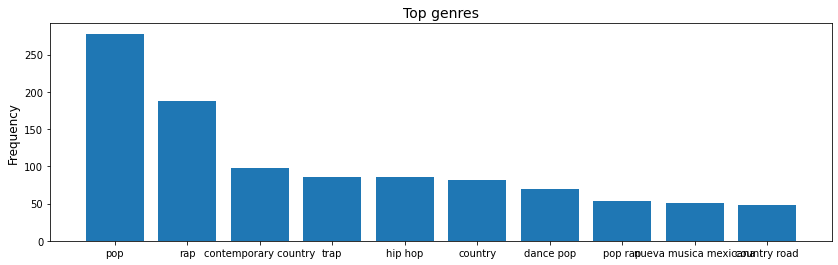

In [14]:
# viz

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(track_df['artist_genres']).value_counts().index[:10],
        to_1D(track_df['artist_genres']).value_counts().values[:10])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top genres", size = 14)

In [15]:
# Trouvez les 20 meilleurs artistes triés par le nombre d'abonnés pour chacun des 10 meilleurs genres :

top_10_genres = list(to_1D(track_df['artist_genres']).value_counts().index[:20])

top_artists_by_genre = []

for genre in top_10_genres:
  for index, row in by_art_fol.iterrows():
    if genre in row['artist_genres']:
      top_artists_by_genre.append({'artist_name':row['artist_name'], 'artist_genre':genre})
      break

pd.json_normalize(top_artists_by_genre)


,artist_name,artist_genre
0,Ed Sheeran,pop
1,Drake,rap
2,Luke Bryan,contemporary country
3,Migos,trap
4,Drake,hip hop
5,Luke Bryan,country
6,Ariana Grande,dance pop
7,Migos,pop rap
8,Christian Nodal,nueva musica mexicana
9,Luke Bryan,country road


In [16]:
# Trouvez les 20 meilleurs morceaux triés par popularité pour chacun des 10 meilleurs genres :

by_track_pop = pd.DataFrame(track_df.sort_values(by=['track_popularity'], ascending=False)[['track_popularity','track_name', 'artist_name','artist_genres', 'track_id']])

by_track_pop.astype(str).drop_duplicates().head(20)

top_songs_by_genre = []

for genre in top_10_genres:
  for index, row in by_track_pop.iterrows():
    if genre in row['artist_genres']:
      top_songs_by_genre.append({'track_name':row['track_name'], 'track_popularity':row['track_popularity'],'artist_name':row['artist_name'], 'artist_genre':genre})
      break
    
pd.json_normalize(top_songs_by_genre)


,track_name,track_popularity,artist_name,artist_genre
0,Sunroof,90,Nicky Youre,pop
1,The Color Violet,84,Tory Lanez,rap
2,Wasted On You,82,Morgan Wallen,contemporary country
3,The Color Violet,84,Tory Lanez,trap
4,Knife Talk (with 21 Savage ft. Project Pat),84,Drake,hip hop
5,Wasted On You,82,Morgan Wallen,country
6,Woman,87,Doja Cat,dance pop
7,The Color Violet,84,Tory Lanez,pop rap
8,Fuga Pa Cali 2,80,Grupo Los de la O,nueva musica mexicana
9,Buy Dirt,79,Jordan Davis,country road


In [21]:
# En quoi les pistes les plus populaires sont-elles différentes de toutes les pistes du jeu de données ? 
# Découvrons-le en traçant un portrait des caractéristiques des ensembles correspondants, étant donné les valeurs moyennes des caractéristiques sélectionnées.

feat_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
top_100_feat = pd.DataFrame(columns=feat_cols)

for i, track in by_track_pop[:100].iterrows():
  features = tf_df[tf_df['id'] == track['track_id']]
  top_100_feat = top_100_feat.append(features, ignore_index=True)


top_100_feat = top_100_feat[feat_cols]

#from sklearn import preprocessing

mean_vals = pd.DataFrame(columns=feat_cols)
mean_vals = mean_vals.append(top_100_feat.mean(), ignore_index=True)
mean_vals = mean_vals.append(tf_df[feat_cols].mean(), ignore_index=True)
print(mean_vals)

import plotly.graph_objects as go
#import plotly.offline as pyo

fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_vals.iloc[0], theta=feat_cols, fill='toself', name='Top 100'),
        go.Scatterpolar(r=mean_vals.iloc[1], theta=feat_cols, fill='toself', name='All'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Feature comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

#pyo.plot(fig)
fig.show()

C:\Users\cathe\AppData\Local\Temp\ipykernel_4340\959304778.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\cathe\AppData\Local\Temp\ipykernel_4340\959304778.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



  danceability    energy speechiness acousticness instrumentalness  liveness  \
0      0.66559   0.67209    0.083731     0.221472         0.062288  0.157962   
1     0.642261  0.612001    0.116211     0.265737         0.058089  0.177144   

    valence  
0  0.479834  
1  0.488183  


C:\Users\cathe\AppData\Local\Temp\ipykernel_4340\959304778.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\cathe\AppData\Local\Temp\ipykernel_4340\959304778.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Il semble que les chansons les plus populaires soient légèrement plus dansantes et présentent plus de valence. Ils ont également zéro instrumentalité et peu de vivacité.

In [22]:
# Obtenir des recommandations
# La dernière étape de notre analyse consiste à obtenir des recommandations de pistes en fonction de l'identifiant de l'artiste, du genre et de l'identifiant de la piste. 
# La sortie est aléatoire, donc Spotify ne manque jamais de suggestions de contenu.

rec = sp.recommendations(seed_artists=["3PhoLpVuITZKcymswpck5b"], seed_genres=["pop"], seed_tracks=["1r9xUipOqoNwggBpENDsvJ"], limit=100)

for track in rec['tracks']:
  print(track['artists'][0]['name'], track['name'])

DJ Snake You Know You Like It
Zedd The Middle
Maroon 5 What Lovers Do
Martin Garrix There for You
Wham! I'm Your Man
Katy Perry Roar
Panic! At The Disco Don't Let The Light Go Out
Jonas Blue Rise
Janji Heroes Tonight
Christopher Cross Never Be the Same
NEFFEX Fight Back
Hailee Steinfeld Rock Bottom
Måneskin THE LONELIEST
Badfinger Maybe Tomorrow - Remastered 2010
Childish Gambino This Is America
Elton John This Train Don't Stop There Anymore
Snakehips Either Way (feat. Joey Bada$$)
Jon Bellion All Time Low
The Beatles Here Comes The Sun - Remastered 2009
Lady Gaga Bad Romance
Ty Dolla $ign Love U Better (feat. Lil Wayne & The-Dream)
Nathan Dawe 21 Reasons (feat. Ella Henderson) - Alle Farben Remix
Barry Gibb I’ve Gotta Get A Message To You (feat. Keith Urban)
Maroon 5 What Lovers Do (feat. SZA)
Barns Courtney Champion
Kiiara Whippin (feat. Felix Snow)
Andy Grammer Saved My Life (with R3HAB) [R3HAB VIP Remix]
Imagine Dragons It's Time
ScHoolboy Q Studio
Sigala Living Without You
Elton J

Conclusion  
Cet article donne un bref aperçu des méthodes de Spotify Web API et montre comment les données récupérées peuvent être analysées et tracées.  
https://github.com/Vice10/ds_notebooks/blob/main/spotify_analysis.ipynb